In [1]:
# %matplotlib widget
import matplotlib as mpl

# mpl.rc('figure' dpi=300)
mpl.rc('image', interpolation='none')
mpl.rc('savefig', dpi=300, transparent=True, bbox='tight')

# Set the rendering backend.
# mpl.use('qt5agg')

# TODO: Verify if this is still needed?
# %config InlineBackend.figure_format = 'retina'

In [2]:
import fpipy as fpi
import matplotlib.collections as collections
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d

In [3]:
prefix = '/root/data/examples'
# file_name = 'a965ccdcc83d466386649b1a21a927b1078a71bb'
file_name = '766c5be2edbce6492a3bcbd850a0cdaf1654dad9'
file_path = '{0}/{1}/RawMeasurementCube.hdr'.format(prefix, file_name)

raw_dataset = fpi.read_ENVI_cfa(file_path)
rad_dataset = fpi.raw_to_radiance(raw_dataset)

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [4]:
rad_cube = rad_dataset.radiance.values.copy()
print(rad_cube.min(), rad_cube.max())
print(rad_cube[200:1000, 500:1500].min(), rad_cube[200:1000, 500:1500].max())

-0.057320032031230435 0.1779179723780686
-0.006051875328445233 0.1779179723780686


In [5]:
file_path = '{0}/{1}/WhiteReference.hdr'.format(prefix, file_name)

raw_dataset = fpi.read_ENVI_cfa(file_path)
ref_dataset = fpi.raw_to_radiance(raw_dataset)

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [6]:
ref_cube = ref_dataset.radiance.values.copy()
print(ref_cube.min(), ref_cube.max())
print(ref_cube[200:1000, 500:1500].min(), ref_cube[200:1000, 500:1500].max())

-0.16333744901278743 0.28334324624759133
-0.004075522884812665 0.23819479902504942


In [7]:
ref_cube[ref_cube < 0] = 0.0000001

print(ref_cube.min(), ref_cube.max())
print(ref_cube[200:1000, 500:1500].min(), ref_cube[200:1000, 500:1500].max())

4.8517304371724374e-08 0.28334324624759133
1e-07 0.23819479902504942


In [8]:
cropped = rad_cube[200:1000, 500:1500]

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

-0.006051875328445233 0.1779179723780686
(506, 434, 119)
(450, 846, 82)


In [9]:
cropped = cropped / ref_cube[200:1000, 500:1500]
# cropped = cropped / cropped.max()

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

-0.08014212056870358 309198.48101899354
(506, 434, 119)
(54, 30, 119)


In [10]:
cropped = cropped[..., 0:100]
# cropped = cropped / cropped.max()

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

0.004864181553632332 1.2084588712622557
(411, 479, 3)
(60, 958, 99)


In [11]:
wavelengths = rad_dataset.wavelength.values[0:100]
print(wavelengths)

[460.   461.84 464.2  466.43 468.96 471.16 473.83 476.66 479.12 481.5
 483.88 486.82 489.01 491.28 494.12 496.09 498.67 501.44 504.48 506.89
 509.53 512.15 514.76 517.53 520.37 523.1  525.76 528.48 531.25 534.27
 536.97 539.63 542.39 545.15 547.8  550.48 553.09 555.93 558.72 561.27
 564.1  566.55 569.19 571.85 575.39 579.44 582.22 584.92 587.49 590.13
 592.77 595.46 598.37 600.98 603.7  606.47 609.16 612.   615.07 617.84
 621.01 623.53 626.28 629.25 632.06 634.8  637.95 640.51 643.59 646.8
 649.04 651.97 654.93 657.75 660.5  663.63 666.51 669.53 672.59 675.
 678.46 682.67 687.25 691.66 696.16 700.39 704.64 708.56 712.78 716.63
 720.81 725.04 729.34 733.99 738.38 742.65 746.64 751.27 755.19 759.42]


In [12]:
# https://joseph-long.com/writing/colorbars/
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

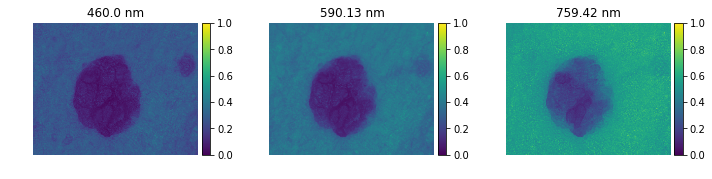

In [33]:
fig = plt.figure(figsize=(10, 4))
ax1, ax2, ax3 = fig.subplots(ncols=3)

im1 = ax1.imshow(cropped[..., 0], vmin=0, vmax=1)
ax1.set_title(f'{wavelengths[0]} nm')
ax1.set_axis_off()
colorbar(im1)

im2 = ax2.imshow(cropped[..., 49], vmin=0, vmax=1)
ax2.set_title(f'{wavelengths[49]} nm')
ax2.set_axis_off()
colorbar(im2)


im3 = ax3.imshow(cropped[..., 99], vmin=0, vmax=1)
ax3.set_title(f'{wavelengths[99]} nm')
ax3.set_axis_off()
colorbar(im3)

fig.tight_layout()
fig.savefig('output/fig2.pdf')
fig.show()

In [23]:
group1_xy = (100, 100)
group1_wh = (100, 100)
group1 = cropped[group1_xy[1]:group1_xy[1]+group1_wh[1], group1_xy[0]:group1_xy[0]+group1_wh[0]]

group2_xy = (400, 350)
group2_wh = (100, 100)
group2 = cropped[group2_xy[1]:group2_xy[1]+group2_wh[1], group2_xy[0]:group2_xy[0]+group2_wh[0]]

group3_xy = (790, 590)
group3_wh = (100, 100)
group3 = cropped[group3_xy[1]:group3_xy[1]+group3_wh[1], group3_xy[0]:group3_xy[0]+group3_wh[0]]

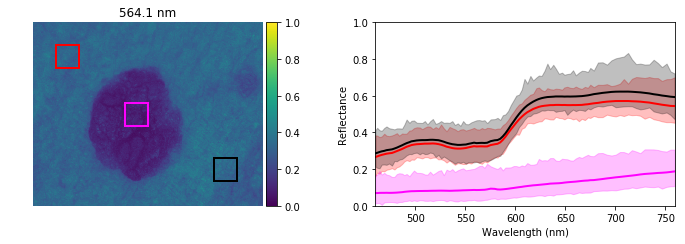

In [32]:
axis = (0, 1)

fig = plt.figure(figsize=(10, 3.5))
ax1, ax2 = fig.subplots(ncols=2)

im1 = ax1.imshow(cropped[..., 40], vmin=0, vmax=1)
ax1.set_title(f'{wavelengths[40]} nm')
ax1.set_axis_off()
colorbar(im1)

group1_fc = 'red'
group2_fc = 'magenta'
group3_fc = 'black'

patch_group1 = patches.Rectangle(
    xy=group1_xy, 
    width=group1_wh[0], 
    height=group1_wh[1],
    color=group1_fc,
    linewidth=2,
    label='G1',
    fill=False)
ax1.add_patch(patch_group1)

patch_group2 = patches.Rectangle(
    xy=group2_xy, 
    width=group2_wh[0], 
    height=group2_wh[1],
    color=group2_fc,
    linewidth=2,
    label='G2',
    fill=False)
ax1.add_patch(patch_group2)

patch_group3 = patches.Rectangle(
    xy=group3_xy, 
    width=group3_wh[0], 
    height=group3_wh[1],
    color=group3_fc,
    linewidth=2,
    label='G3',
    fill=False)
ax1.add_patch(patch_group3)

ax2.set_xlabel('Wavelength (nm)')
ax2.set_ylabel('Reflectance')
ax2.set_xlim(wavelengths[0], wavelengths[-1])
ax2.set_ylim(0.0, 1.0)

spectra_mean = group1[..., 0:100].mean(axis=axis)
spectra_std = group1[..., 0:100].std(axis=axis)
spectra_min = group1[..., 0:100].min(axis=axis)
spectra_max = group1[..., 0:100].max(axis=axis)
ax2.fill_between(wavelengths, spectra_min, spectra_max, color=group1_fc, alpha=0.25)
lines, = ax2.plot(wavelengths, spectra_mean, color=group1_fc, lw=2)

spectra_mean = group2[..., 0:100].mean(axis=axis)
spectra_std = group2[..., 0:100].std(axis=axis)
spectra_min = group2[..., 0:100].min(axis=axis)
spectra_max = group2[..., 0:100].max(axis=axis)

ax2.fill_between(wavelengths, spectra_min, spectra_max, color=group2_fc, alpha=0.25)
lines, = ax2.plot(wavelengths, spectra_mean, color=group2_fc, lw=2)

spectra_mean = group3[..., 0:100].mean(axis=axis)
spectra_std = group3[..., 0:100].std(axis=axis)
spectra_min = group3[..., 0:100].min(axis=axis)
spectra_max = group3[..., 0:100].max(axis=axis)

ax2.fill_between(wavelengths, spectra_min, spectra_max, color=group3_fc, alpha=0.25)
lines, = ax2.plot(wavelengths, spectra_mean, color=group3_fc, lw=2)

fig.tight_layout()
fig.savefig('output/fig3.pdf')
fig.show()